In [1]:
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

## Spam SMS Detector 

Nowadays we are usually flooded with spam emails and in that we may lose our important emails, so here is one such project where we can create our own spam mail detector

In [2]:
message_data = pd.read_csv("spam.csv",encoding = "latin")
message_data.head()

,Class,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [3]:
message_data = message_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [4]:
message_data = message_data.rename(columns = {'Class':'Spam/Not_Spam','msg':'message'})

**WordCloud**

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

- WordCloud of Spam messages

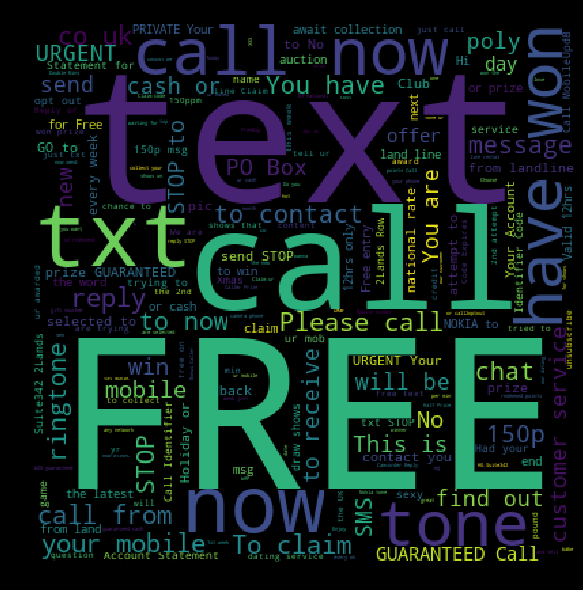

In [6]:
spam_words=' '.join(list(message_data[message_data['Spam/Not_Spam']=='spam']['message']))
spam_wc=WordCloud(width=400,height=400,).generate(spam_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Spam words WordCloud')
plt.tight_layout(pad = 0)
plt.show()

- WordCloud of not spam(Ham) messages

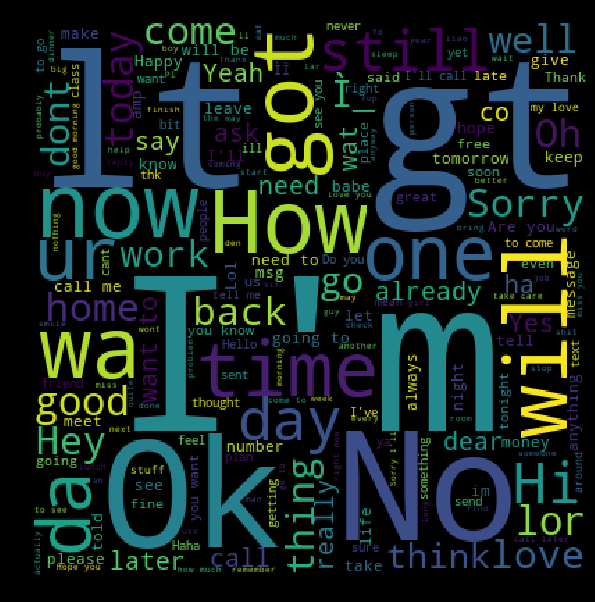

In [7]:
ham_words=' '.join(list(message_data[message_data['Spam/Not_Spam']=='ham']['message']))
ham_wc=WordCloud(width=400,height=400).generate(ham_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Ham words WordCloud')
plt.show()

I will be preprocessing the text and removing punctutation and to train our model we need to tokenize the words of spam and ham

**Text Preprocessing**

In [8]:
message_data_copy = message_data['message'].copy()

In [9]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation)) #removing punctuation
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')] #removing stopwords
    return " ".join(text)

In [10]:
message_data_copy = message_data_copy.apply(text_preprocess)

In [11]:
vectorizer = TfidfVectorizer("english")

In [12]:
message_mat = vectorizer.fit_transform(message_data_copy)
message_mat

<5572x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 47254 stored elements in Compressed Sparse Row format>

### Data Modeling

In [13]:
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, 
                                                        message_data['Spam/Not_Spam'], test_size=0.3, random_state=20)

- Applying Logisitc Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred = Spam_model.predict(message_test)
accuracy_score(spam_nospam_test,pred)

0.9383971291866029

In [15]:
from sklearn.metrics import classification_report
print(classification_report(spam_nospam_test,pred))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.96      1439
        spam       0.88      0.64      0.74       233

   micro avg       0.94      0.94      0.94      1672
   macro avg       0.91      0.81      0.85      1672
weighted avg       0.94      0.94      0.93      1672



In [16]:
pd.DataFrame(confusion_matrix(spam_nospam_test,pred),index=[['actual', 'actual'], ['spam', 'ham']],
    columns=[['predicted', 'predicted'], ['spam', 'ham']]
)

predicted     
                 spam  ham
actual spam      1419   20
       ham         83  150

Improving accuracy by stemming

In [17]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [18]:
message_data_copy = message_data_copy.apply(stemmer)
vectorizer = TfidfVectorizer("english")
message_mat = vectorizer.fit_transform(message_data_copy)

In [19]:

message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, 
                                                        message_data['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred = Spam_model.predict(message_test)
print("accuracy is",accuracy_score(spam_nospam_test,pred))


accuracy is 0.9659090909090909


In [21]:
from sklearn.metrics import classification_report
print(classification_report(spam_nospam_test,pred))

              precision    recall  f1-score   support

         ham       0.95      0.99      0.97      1439
        spam       0.91      0.68      0.78       233

   micro avg       0.95      0.95      0.95      1672
   macro avg       0.93      0.83      0.87      1672
weighted avg       0.94      0.95      0.94      1672



In [22]:
pd.DataFrame(confusion_matrix(spam_nospam_test,pred),index=[['actual', 'actual'], ['spam', 'ham']],
    columns=[['predicted', 'predicted'], ['spam', 'ham']]
)

predicted     
                 spam  ham
actual spam      1424   15
       ham         75  158

-  Applying Naive Bayes

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [24]:
cv=CountVectorizer()
message_mat1 = cv.fit_transform(message_data_copy)

In [25]:

message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat1, 
                                                        message_data['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [26]:
clf =MultinomialNB()
clf.fit(message_train, spam_nospam_train)
pred = clf.predict(message_test)
accuracy_score(spam_nospam_test,pred)

0.9730861244019139

In [27]:
pd.DataFrame(confusion_matrix(spam_nospam_test,pred),index=[['actual', 'actual'], ['spam', 'ham']],
    columns=[['predicted', 'predicted'], ['spam', 'ham']]
)

predicted     
                 spam  ham
actual spam      1415   24
       ham         21  212

In [28]:
from sklearn.metrics import classification_report
print(classification_report(spam_nospam_test,pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98      1439
        spam       0.90      0.91      0.90       233

   micro avg       0.97      0.97      0.97      1672
   macro avg       0.94      0.95      0.94      1672
weighted avg       0.97      0.97      0.97      1672



##### Models and Accuracy Score:
- Logisitc Regression 0.93
- Aftert Stemming, Logisitc Regression



We can see by  Naive Bayes  our accuracy score has greatly improved. Number of False negative have greatly reduced, which is a great sign!

Saving our model

In [29]:
from sklearn.externals import joblib
joblib.dump(clf,'NB_spam_model.pkl')

['NB_spam_model.pkl']

Using the spam model, opening it

In [30]:
NB_spam_model = open('NB_spam_model.pkl','rb')
clf = joblib.load(NB_spam_model)